In [1]:
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv('english_only.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61727 entries, 0 to 61726
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           61727 non-null  int64  
 1   Unnamed: 0             61727 non-null  int64  
 2   id                     61727 non-null  object 
 3   graph                  61727 non-null  object 
 4   label                  61727 non-null  object 
 5   source_id              61727 non-null  object 
 6   source_date            61727 non-null  float64
 7   source_language        61727 non-null  object 
 8   source_genre           0 non-null      float64
 9   relevantExcerpt        61727 non-null  object 
 10  adjective              41408 non-null  object 
 11  emotion                861 non-null    object 
 12  license                0 non-null      float64
 13  smellSource            35186 non-null  object 
 14  carrier                6968 non-null   object 
 15  ex

In [3]:
df.drop(['emotion','id','source_id','Unnamed: 0.1', 'source_language','Unnamed: 0','source_genre', 'relevantExcerpt', 'excerpt_id', 'country_codes', 'emolit_emotion', 'license'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61727 entries, 0 to 61726
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   graph                  61727 non-null  object 
 1   label                  61727 non-null  object 
 2   source_date            61727 non-null  float64
 3   adjective              41408 non-null  object 
 4   smellSource            35186 non-null  object 
 5   carrier                6968 non-null   object 
 6   words                  61727 non-null  object 
 7   excerpt_value_cleaned  61727 non-null  object 
 8   source_label_cleaned   61727 non-null  object 
 9   country_names          61727 non-null  object 
 10  plutchik_emotion       61727 non-null  object 
dtypes: float64(1), object(10)
memory usage: 5.2+ MB


In [5]:
df.head()

,graph,label,source_date,adjective,smellSource,carrier,words,excerpt_value_cleaned,source_label_cleaned,country_names,plutchik_emotion
0,british-library,"['sniff', 'odours', 'scent', 'smell', 'scented']",1895.0,"['scented', 'sweet scented', 'dry']",[{'id': 'http://data.odeuropa.eu/vocabulary/ol...,[{'id': 'http://data.odeuropa.eu/vocabulary/ol...,"['odour', 'peculiar']",rera display mu anybody located 1 j yet hang c...,english seaman sixteenth century lecture deliv...,['Iran'],anger
1,medical-heritage,"['odour', 'ardour', 'perfumes']",1924.0,NaN,[{'id': 'http://data.odeuropa.eu/vocabulary/ol...,NaN,"['odour', 'of the breath', 'intensely foul']",abscess lung may declare jsudden discharge mat...,report 1924,['Egypt'],disgust
2,british-library,"['sniff', 'odours', 'scent', 'smell', 'scented']",1895.0,"['scented', 'sweet scented', 'dry']",[{'id': 'http://data.odeuropa.eu/vocabulary/ol...,[{'id': 'http://data.odeuropa.eu/vocabulary/ol...,"['smell', 'I', 'this']",beg said hope hurt plaguy thick see right arm ...,english seaman sixteenth century lecture deliv...,['Iran'],sadness
3,medical-heritage,['stench'],1911.0,intolerably offensive,[{'id': 'http://data.odeuropa.eu/vocabulary/ol...,NaN,"['fetid', 'sweats', 'profuse fetid']",paet â  ¢ anything else occur twelfth day acc...,gynecological obstetrical surgical aspect pell...,['Egypt'],sadness
4,medical-heritage,['Perfume'],1865.0,NaN,NaN,[{'id': 'http://data.odeuropa.eu/object/fe5c34...,"['fragrant', 'ointments']",perfumed water anointing washing body also use...,stammering stuttering nature treatment,['Egypt'],trust


In [6]:
df.iloc[191,5]

"[{'id': 'http://data.odeuropa.eu/vocabulary/olfactory-objects/530', 'label': 'Snuff', 'exemplifies': 'http://data.odeuropa.eu/vocabulary/olfactory-objects/530'}]"

In [7]:
def extract_carriers(json_str):
    if isinstance(json_str, str):
        try:
            json_obj = json.loads(json_str.replace("'", "\""))
            return json_obj[0]['label']
        except (json.JSONDecodeError, KeyError, IndexError):
            return None
    return None
    
df['carrier'] = df['carrier'].apply(extract_carriers)
print(df.iloc[191,5])

Snuff


In [8]:
df.iloc[15,4]

"[{'id': 'http://data.odeuropa.eu/vocabulary/olfactory-objects/432', 'label': 'Ambergris'}, {'id': 'http://data.odeuropa.eu/vocabulary/olfactory-objects/269', 'label': 'Incense'}]"

In [9]:
def extract_smellSources(json_str):
    if isinstance(json_str, str):
        try:
            json_obj = json.loads(json_str.replace("'", "\""))
            return [item['label'] for item in json_obj]
        except (json.JSONDecodeError, KeyError, IndexError):
            return None
    return None

df['smellSource'] = df['smellSource'].apply(extract_smellSources)
print(df.iloc[15,4])

['Ambergris', 'Incense']


In [10]:
df.head()

,graph,label,source_date,adjective,smellSource,carrier,words,excerpt_value_cleaned,source_label_cleaned,country_names,plutchik_emotion
0,british-library,"['sniff', 'odours', 'scent', 'smell', 'scented']",1895.0,"['scented', 'sweet scented', 'dry']","[Cigar, Tussie Mussie]",Air,"['odour', 'peculiar']",rera display mu anybody located 1 j yet hang c...,english seaman sixteenth century lecture deliv...,['Iran'],anger
1,medical-heritage,"['odour', 'ardour', 'perfumes']",1924.0,NaN,[Oil],None,"['odour', 'of the breath', 'intensely foul']",abscess lung may declare jsudden discharge mat...,report 1924,['Egypt'],disgust
2,british-library,"['sniff', 'odours', 'scent', 'smell', 'scented']",1895.0,"['scented', 'sweet scented', 'dry']","[Cigar, Tussie Mussie]",Air,"['smell', 'I', 'this']",beg said hope hurt plaguy thick see right arm ...,english seaman sixteenth century lecture deliv...,['Iran'],sadness
3,medical-heritage,['stench'],1911.0,intolerably offensive,[Mud],None,"['fetid', 'sweats', 'profuse fetid']",paet â  ¢ anything else occur twelfth day acc...,gynecological obstetrical surgical aspect pell...,['Egypt'],sadness
4,medical-heritage,['Perfume'],1865.0,NaN,None,None,"['fragrant', 'ointments']",perfumed water anointing washing body also use...,stammering stuttering nature treatment,['Egypt'],trust


In [11]:
unique_carriers = df['carrier'].dropna().unique()
print(unique_carriers)
print(len(unique_carriers))

['Air' 'Sea wind' 'Snuff']
3


In [12]:
all_smellSources = [label for sublist in df['smellSource'].dropna() for label in sublist]
unique_smell_sources = pd.unique(all_smellSources)
print(unique_smell_sources)
print(len(unique_smell_sources))

['Cigar' 'Tussie Mussie' 'Oil' 'Mud' 'Ambergris' 'Incense' 'Body' 'Drug'
 'Aloe' 'Rose' 'Plant' 'Tobacco' 'Odor of sanctity' 'Flower'
 'Gum tragacanth' 'Frankincense' 'Myrrh' 'Fragrance / Cosmetic' 'Dressing'
 'Cat' 'Mosque' 'Man' 'Shrub' 'Ozone' 'Hyacinth' 'Jasmine' 'Sulphur'
 'Wood' 'Vessel' 'Broth' 'Asphalt' 'Beer' 'Lane' 'Fumes' 'Powder'
 'Ointment' 'Eau de cologne' 'Labdanum' 'Gum' 'Sandalwood' 'Tree' 'Fruit'
 'Thyme' 'Goat' 'Benzoin' 'Aromatic' 'Spice' 'Ham' 'Castoreum' 'Orangerie'
 'Rosary' 'Water' 'Chestnut' 'Daffodil' 'Onion' 'Excrement' 'Air'
 'Cedar (Virginia)' 'Ether' 'Perfume bottle' 'Dust' 'Petroleum' 'Dog'
 'Cadaver' 'Camel' 'Element' 'Sewer']
67


/var/folders/jr/qdhrcycd4rx8yxrqjzg8czdw0000gn/T/ipykernel_90790/736607952.py:2: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_smell_sources = pd.unique(all_smellSources)


/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

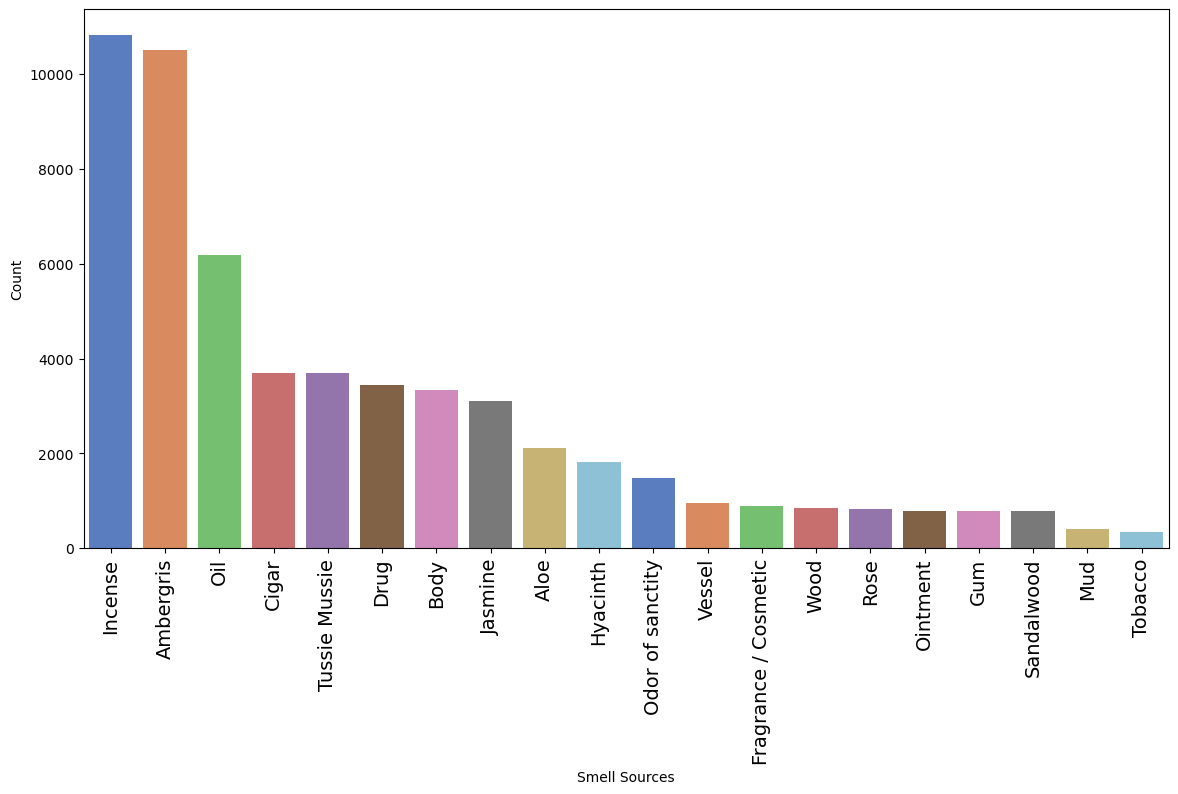

In [17]:
smellSources_counts = Counter(all_smellSources)
top_20 = dict(smellSources_counts.most_common(20))
labels, counts = zip(*top_20.items())

plt.figure(figsize=(14, 7))
sns.barplot(x=list(labels), y=list(counts), palette='muted')
plt.xlabel('Smell Sources')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=14)
plt.savefig('top20smellsSources.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
def standardize_labels(label):
    if isinstance(label, str):
        if label.startswith('[') and label.endswith(']'):
            return eval(label) 
        else:
            return [label]
    return []

df['label'] = df['label'].apply(standardize_labels)
df['words'] = df['words'].apply(standardize_labels)
df['adjective'] = df['adjective'].apply(standardize_labels)

/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

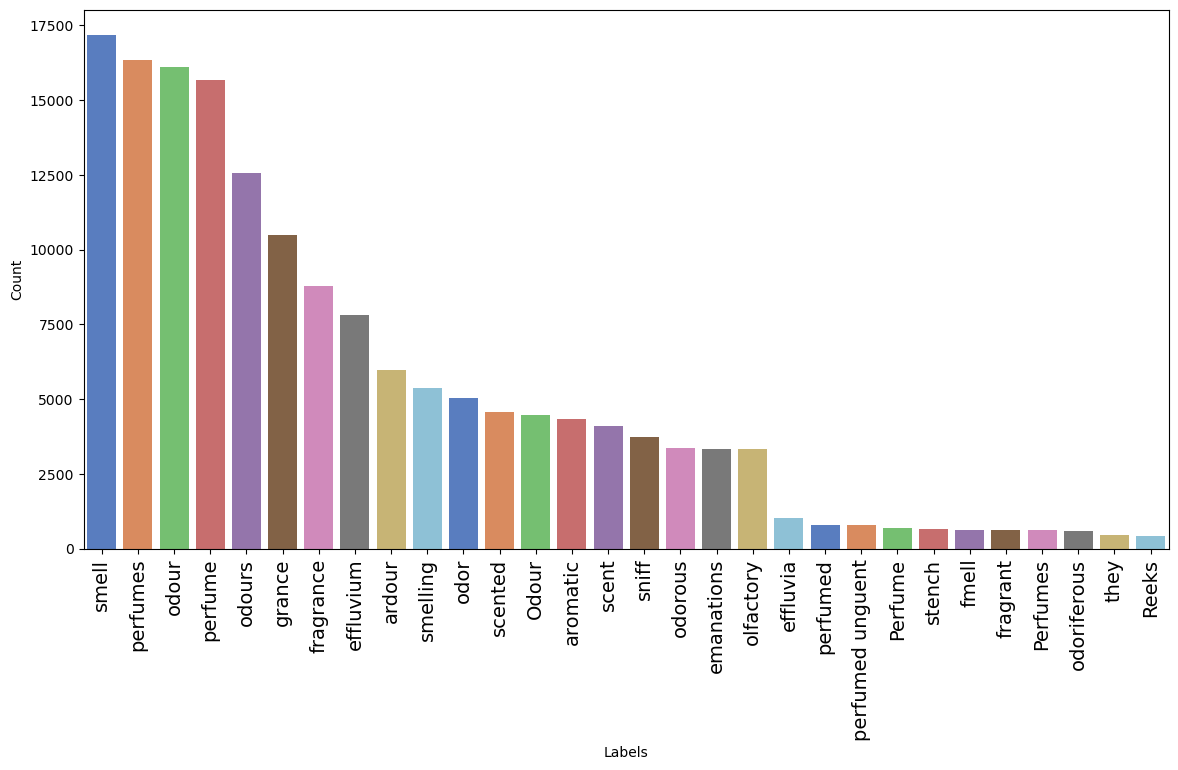

In [20]:
all_labels = [lbl for sublist in df['label'].dropna() for lbl in sublist]
label_counts = Counter(all_labels)
top_20 = dict(label_counts.most_common(30))
labels, counts = zip(*top_20.items())

plt.figure(figsize=(14, 7))
sns.barplot(x=list(labels), y=list(counts), palette='muted')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=14)
plt.savefig('top20labels.png', dpi=300, bbox_inches='tight')
plt.show()

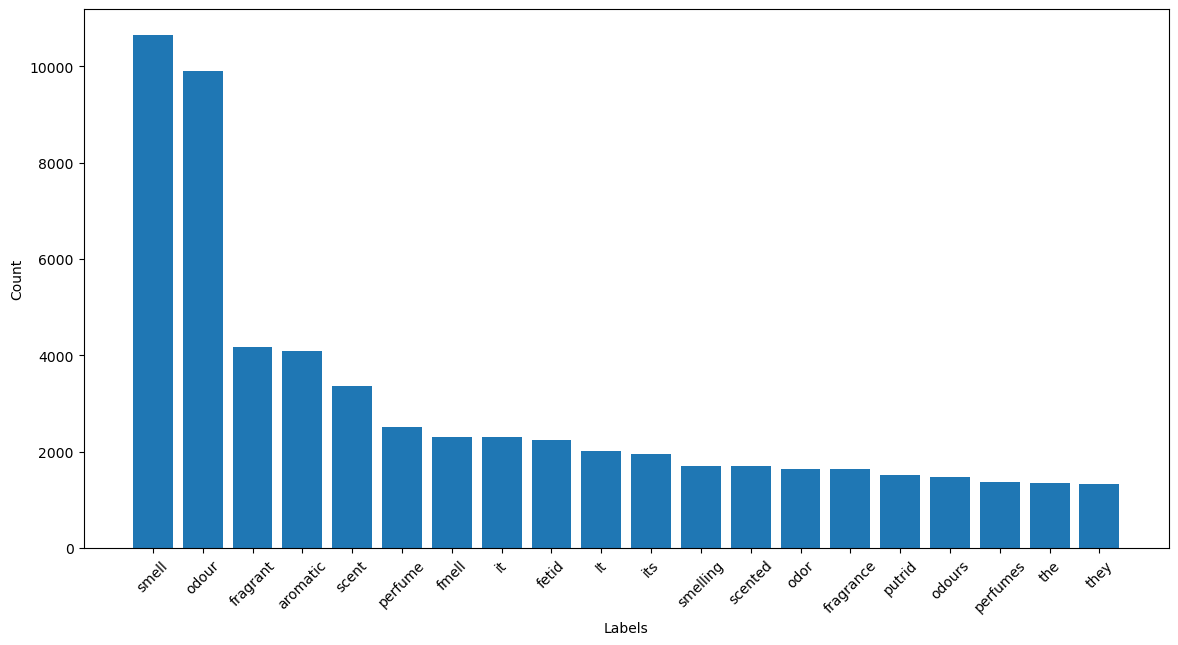

In [16]:
all_words = [lbl for sublist in df['words'].dropna() for lbl in sublist]
words_counts = Counter(all_words)
top_20 = dict(words_counts.most_common(20))
labels, counts = zip(*top_20.items())
plt.figure(figsize=(14, 7))
plt.bar(labels, counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('top20words.png', dpi=300, bbox_inches='tight')
plt.show()

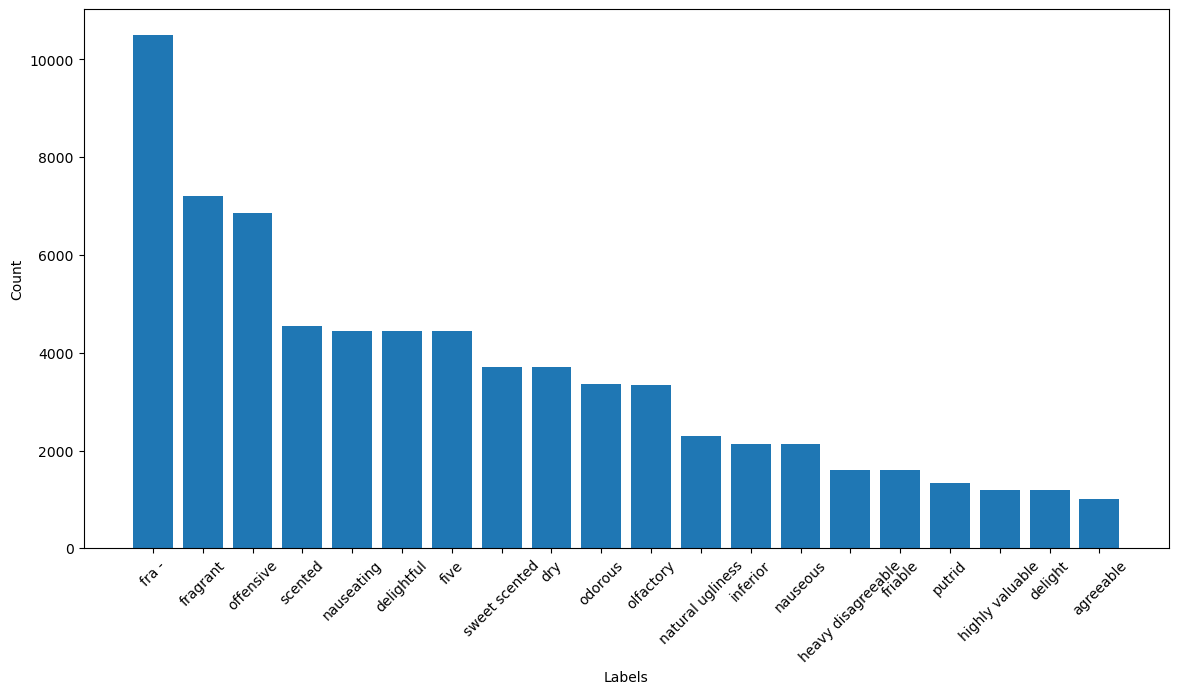

In [17]:
all_adjective = [lbl for sublist in df['adjective'].dropna() for lbl in sublist]
adjective_counts = Counter(all_adjective)
top_20 = dict(adjective_counts.most_common(20))
labels, counts = zip(*top_20.items())
plt.figure(figsize=(14, 7))
plt.bar(labels, counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('top20adjective.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
def standardize_countries(country_names):
    if isinstance(country_names, str):
        if country_names.startswith('[') and country_names.endswith(']'):
            return eval(country_names)
    return []

df['country_names'] = df['country_names'].apply(standardize_countries)

In [19]:
country_smell_source = {}

for index, row in df.iterrows():
    countries = row['country_names']
    smells = row['smellSource']
    if countries and smells:
        for country in countries:
            if country not in country_smell_source:
                country_smell_source[country] = []
            country_smell_source[country].extend(smells)

most_common_smell_source_per_country = {country: Counter(smells).most_common(1)[0][0] for country, smells in country_smell_source.items()}
print(most_common_smell_source_per_country)
countries = list(most_common_smell_source_per_country.keys())
smells = list(most_common_smell_source_per_country.values())

{'Iran': 'Ambergris', 'Egypt': 'Oil', 'Palestine': 'Incense', 'Yemen': 'Aloe', 'Saudi Arabia': 'Odor of sanctity', 'United Arab Emirates': 'Flower', 'Jordan': 'Drug', 'Lebanon': 'Cedar (Virginia)', 'Syria': 'Odor of sanctity', 'Iraq': 'Labdanum'}
